In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

rng = np.random.default_rng()

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.dpi'] = 150

In [2]:
p_true = [0.01, 0.02, 0.03, 0.04]
N = 20000
K = len(p_true)

In [3]:
n1 = N//K
res1 = rng.binomial(n1, p_true)

In [4]:
beta1 = rng.beta(res1+1, n1-res1+1, size=(1000, K))
p1 = beta1.mean(axis=0)
hdi1 = az.hdi(beta1, hdi_prob=0.95)
cr1 = np.sum(res1) / N

/home/michael/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


In [5]:
res2 = np.ones((K, 2))
for i in range(N):
    j = np.argmax(rng.beta(res2[:, 0], res2[:, 1]))
    k = rng.binomial(1, p_true[j])
    res2[j, 1-k] += 1

In [6]:
beta2 = rng.beta(res2[:, 0], res2[:, 1], size=(1000, K))
p2 = beta2.mean(axis=0)
hdi2 = az.hdi(beta2, hdi_prob=0.95)
cr2 = np.sum(res2[:, 0]-1) / N

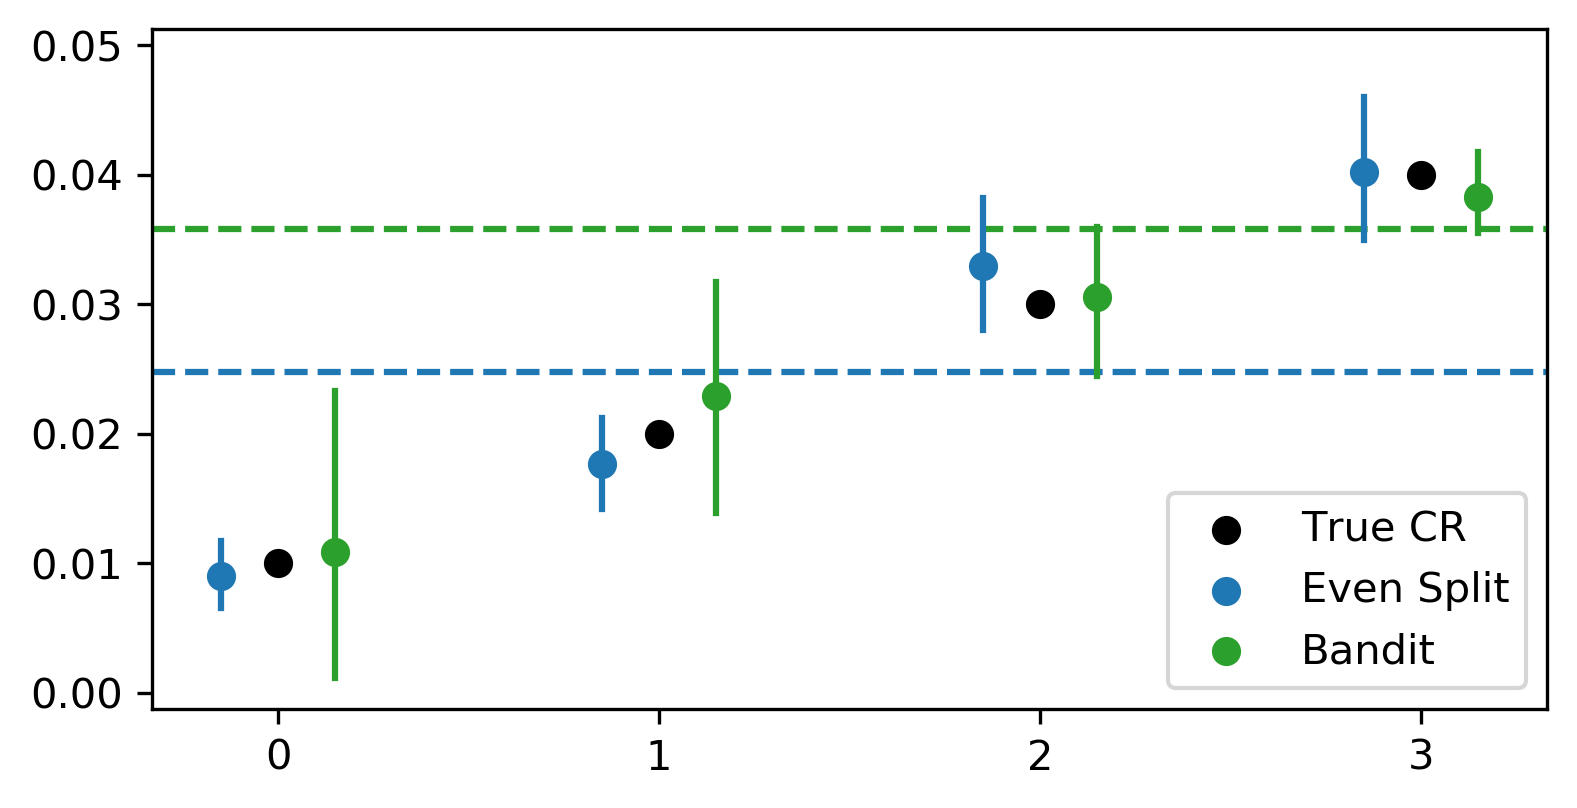

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.axhline(y=cr1, ls='--', color='tab:blue', zorder=-1)
ax.axhline(y=cr2, ls='--', color='tab:green', zorder=-1)
ax.scatter(np.arange(K), p_true, color='k', label='True CR')
ax.scatter(np.arange(K)-0.15, p1, color='tab:blue', label='Even Split')
ax.scatter(np.arange(K)+0.15, p2, color='tab:green', label='Bandit')
for i in range(K):
    ax.plot([i-0.15, i-0.15], [hdi1[i, 0], hdi1[i, 1]], color='tab:blue')
    ax.plot([i+0.15, i+0.15], [hdi2[i, 0], hdi2[i, 1]], color='tab:green')
ax.set_xticks(np.arange(K));
ax.legend();